<a href="https://colab.research.google.com/github/JaySanthanam/Programming-for-data/blob/main/Worksheets/6_R_worksheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using R for data analysis # 

R is a powerful statistical tool used frequently in science academia. Similar to Python, to use R effectively, we must use a variety of libraries.  

**Run the cell block below to install and load the necessary packages**

In [24]:
# this code needs to be run once to install the packages on your system
# install.packages("tidyverse")
# install.packages("ggplot2")
install.packages("fastDummies")
install.packages("dplyr")                            # Install dplyr package
library("dplyr")                                     # need this for arrange to work

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Run the cell block below here to open the packages ready for use**

In [25]:
# this code needs to be run to open the packages 

# tidyverse includes dpylr which includes all the functions such as mutate, select, summarise etc
library("tidyverse")

# ggplot2 contains all the visualisation tools (similar to matplotlib)
library("ggplot2")

# fastdummies is for dummy coding
library("fastDummies")

# displaying in real numbers 

options(scipen = 999)

# Purpose of this worksheet
---

The purpose of this worksheet is NOT to learn the R programming language.  Rather, it is intended to show some statistical methods that haven't yet been covered, using R as the coding language.  

This will allow some exposure to a different language, used for often different reasons from using Python.


### In this worksheet you will start by using R versions of operations you have already used in Python.  Then you will be analysing student performance data and performing a multiple linear regression. ###

url = "https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/exams.csv"

### Setting variables ### 

```variable <- ...```

**In R we use <- instead of using = python** 

### Reading data from our computer into a variable ###

```data <- read_csv("data.csv")```

### Reading data from a URL into a variable ###

```data <- read_csv("https://raw.github.com/file.csv")```

### Look at the first few rows of the dataset ###

```head(data)```

### Summary of the data ###

```summary(data)```

## Exercise 1
---

Read the data into a variable and have a look at it. 

In [74]:
data <- read_csv("https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/exams.csv")

head(data)

summary(data)


Rows: 1000 Columns: 8

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): gender, ethnicity, parental_education, lunch, preparation_course
dbl (3): math_score, reading_score, writing_score


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
female,group E,some college,free/reduced,none,65,76,71
male,group C,some college,standard,completed,75,72,69
female,group B,some high school,free/reduced,completed,62,56,61
male,group D,some high school,standard,completed,60,60,59
female,group C,high school,free/reduced,completed,34,54,55
female,group B,some college,free/reduced,none,53,66,61


    gender           ethnicity         parental_education    lunch          
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 preparation_course   math_score     reading_score    writing_score   
 Length:1000        Min.   : 13.00   Min.   : 16.00   Min.   : 12.00  
 Class :character   1st Qu.: 57.00   1st Qu.: 60.00   1st Qu.: 58.00  
 Mode  :character   Median : 67.00   Median : 70.00   Median : 69.00  
                    Mean   : 66.86   Mean   : 69.72   Mean   : 68.58  
                    3rd Qu.: 77.00   3rd Qu.: 80.00   3rd Qu.: 80.00  
                    Max.   :100.00 

Looking at the summary results, I see that the mean and meadian are very close in all three subjects. Giving me an idea that the districution might be normal for exam scores. Of course, that this assumes a complete data set and that the area under the curve is 1.

# Lets have a look at the data ###

We can use the `arrange()` function to sort the data or `desc()` function to sort into descending order

```
arranged_column <- arrange(data, column_name)
head(arranged_column)
tail(arranged_column)
summary(arranged_column)
```

We can use the select() function to look at specific columns

```
column_specific <- select(data, column_1, column_2)
column_specific
```



### Exercise 2 ###
---

Now have a go looking at the data in different ways, using the functions above:

In [27]:
# I am going to look at sorting the data based on different columns.

#First one I want to do sort by math score

arranged_prep <- arrange(data, "math_score")
head(arranged_prep)
tail(arranged_prep)
summary(arranged_prep)


gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
female,group E,some college,free/reduced,none,65,76,71
male,group C,some college,standard,completed,75,72,69
female,group B,some high school,free/reduced,completed,62,56,61
male,group D,some high school,standard,completed,60,60,59
female,group C,high school,free/reduced,completed,34,54,55
female,group B,some college,free/reduced,none,53,66,61


gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
female,group D,associate's degree,standard,completed,72,74,80
male,group B,some college,standard,completed,80,73,74
male,group D,high school,standard,completed,82,87,82
female,group C,associate's degree,standard,completed,65,94,93
male,group B,master's degree,free/reduced,none,62,62,57
male,group B,some college,standard,none,38,39,40


    gender           ethnicity         parental_education    lunch          
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 preparation_course   math_score     reading_score    writing_score   
 Length:1000        Min.   : 13.00   Min.   : 16.00   Min.   : 12.00  
 Class :character   1st Qu.: 57.00   1st Qu.: 60.00   1st Qu.: 58.00  
 Mode  :character   Median : 67.00   Median : 70.00   Median : 69.00  
                    Mean   : 66.86   Mean   : 69.72   Mean   : 68.58  
                    3rd Qu.: 77.00   3rd Qu.: 80.00   3rd Qu.: 80.00  
                    Max.   :100.00 

How about descending order..

In [28]:
#I want to do sort by descending order by math score

arranged_prep_desc <- arrange(data, "math_score")
head(arranged_prep_desc)
tail(arranged_prep_desc)
summary(arranged_prep_desc)

gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
female,group E,some college,free/reduced,none,65,76,71
male,group C,some college,standard,completed,75,72,69
female,group B,some high school,free/reduced,completed,62,56,61
male,group D,some high school,standard,completed,60,60,59
female,group C,high school,free/reduced,completed,34,54,55
female,group B,some college,free/reduced,none,53,66,61


gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
female,group D,associate's degree,standard,completed,72,74,80
male,group B,some college,standard,completed,80,73,74
male,group D,high school,standard,completed,82,87,82
female,group C,associate's degree,standard,completed,65,94,93
male,group B,master's degree,free/reduced,none,62,62,57
male,group B,some college,standard,none,38,39,40


    gender           ethnicity         parental_education    lunch          
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 preparation_course   math_score     reading_score    writing_score   
 Length:1000        Min.   : 13.00   Min.   : 16.00   Min.   : 12.00  
 Class :character   1st Qu.: 57.00   1st Qu.: 60.00   1st Qu.: 58.00  
 Mode  :character   Median : 67.00   Median : 70.00   Median : 69.00  
                    Mean   : 66.86   Mean   : 69.72   Mean   : 68.58  
                    3rd Qu.: 77.00   3rd Qu.: 80.00   3rd Qu.: 80.00  
                    Max.   :100.00 

I wonder if I can do the same with multiple columns...worth a try! See below.

In [29]:
# Arranging the data with multiple columns
arranged_data <- arrange(data, "preparation_course", "gender")  
head(arranged_data)
tail(arranged_data)

gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
female,group E,some college,free/reduced,none,65,76,71
male,group C,some college,standard,completed,75,72,69
female,group B,some high school,free/reduced,completed,62,56,61
male,group D,some high school,standard,completed,60,60,59
female,group C,high school,free/reduced,completed,34,54,55
female,group B,some college,free/reduced,none,53,66,61


gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
female,group D,associate's degree,standard,completed,72,74,80
male,group B,some college,standard,completed,80,73,74
male,group D,high school,standard,completed,82,87,82
female,group C,associate's degree,standard,completed,65,94,93
male,group B,master's degree,free/reduced,none,62,62,57
male,group B,some college,standard,none,38,39,40


I am not convinced that arrange did anything. I want to compare it to data.table

In [32]:
install.packages("data.table") # Install data.table package 
library("data.table") # Load data.table package

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [33]:
#Try using data.table instead

data_ordered <- data                                 
setorder(data_ordered, "preparation_course", "gender")                       
head(data_ordered)
tail(data_ordered)  

gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
female,group B,some high school,free/reduced,completed,62,56,61
female,group C,high school,free/reduced,completed,34,54,55
female,group C,associate's degree,standard,completed,58,71,63
female,group D,some high school,free/reduced,completed,55,71,73
female,group E,some college,standard,completed,71,79,82
female,group A,high school,free/reduced,completed,71,85,81


gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
male,group B,some college,standard,none,62,52,53
male,group E,some college,standard,none,100,81,84
male,group C,high school,free/reduced,none,59,63,56
male,group E,high school,standard,none,79,78,69
male,group B,master's degree,free/reduced,none,62,62,57
male,group B,some college,standard,none,38,39,40


Much better! I find that data.table did a better job sorting the data by preparation_course and gender than arrange. 

# Prepare the data for a linear regression

Rows containing null, or error-prone values can affect statistics such as measures of central tendency (e.g. mean, median) and operations such as linear regressions, reducing accuracy.

To check for null values we can use:

``` is.na(data) ```

To remove rows which contain null values we can use:  

``` na.omit(data) ``` 



### Exercise 3
---

Check your dataframe for null values and remove rows with null values if necessary

In [37]:
any_null <- is.na(data)
summary(any_null)

   gender        ethnicity       parental_education   lunch        
 Mode :logical   Mode :logical   Mode :logical      Mode :logical  
 FALSE:1000      FALSE:1000      FALSE:1000         FALSE:1000     
 preparation_course math_score      reading_score   writing_score  
 Mode :logical      Mode :logical   Mode :logical   Mode :logical  
 FALSE:1000         FALSE:1000      FALSE:1000      FALSE:1000     

Okay, there are no null values in the data. There is no need to use omit function.

### Visualise data distribution ### 
---

In statistics, when you are preparing data for analysis, you must first check if your data is Gaussian or not (normally distributed). 

If data is normally distributed, it will have a bell curve and the spread of the data will tend to be small, with the mean centred in the data.

The types of statistical test that are meaningful for the data depend on whether or not your data is normally distributed. 

To check for normality, lets first look at a histogram: 

**Using the ggplot2 package (similar to pythons Matplotlib):**

```qplot(data$column, geom="histogram") ```

In R, `$` is used to specify the dataframe and target column so `data$age` would tell R to look at the age column - in Python pandas this would be ```df['age'] ```

### Exercise 4 ###
---

Create histograms to check the distribution of each numeric column in your data (writing_score, reading_score, math_score)

First I will do the histogram plot for math_score.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



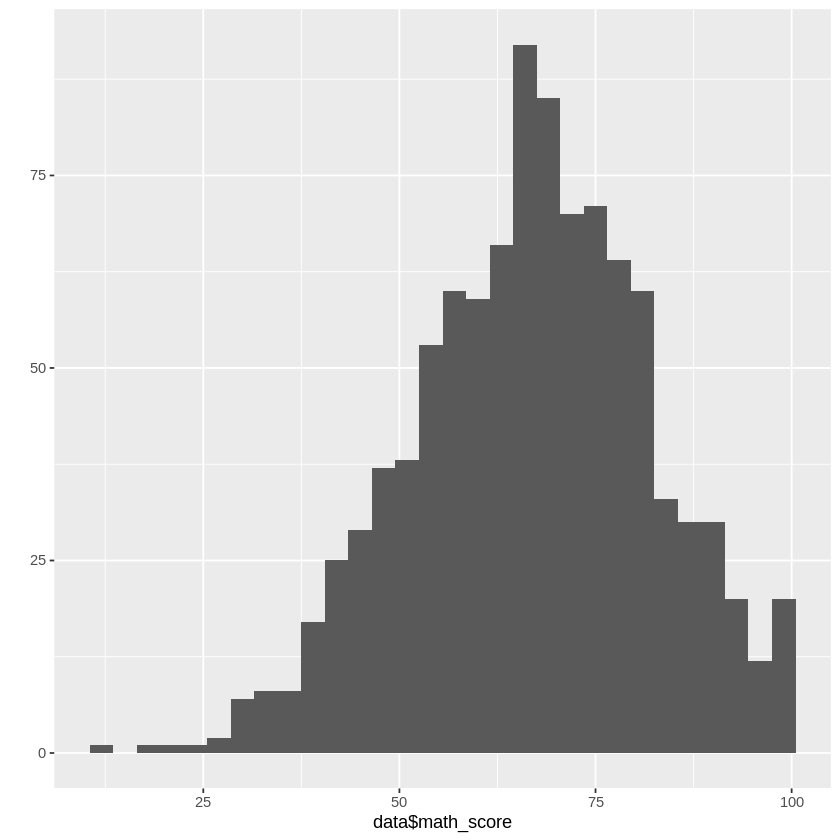

In [38]:
qplot(data$"math_score", geom="histogram")

Okay, it doesn't like the default bin width (and I completely agree!) and also we need better labels. So here we go...

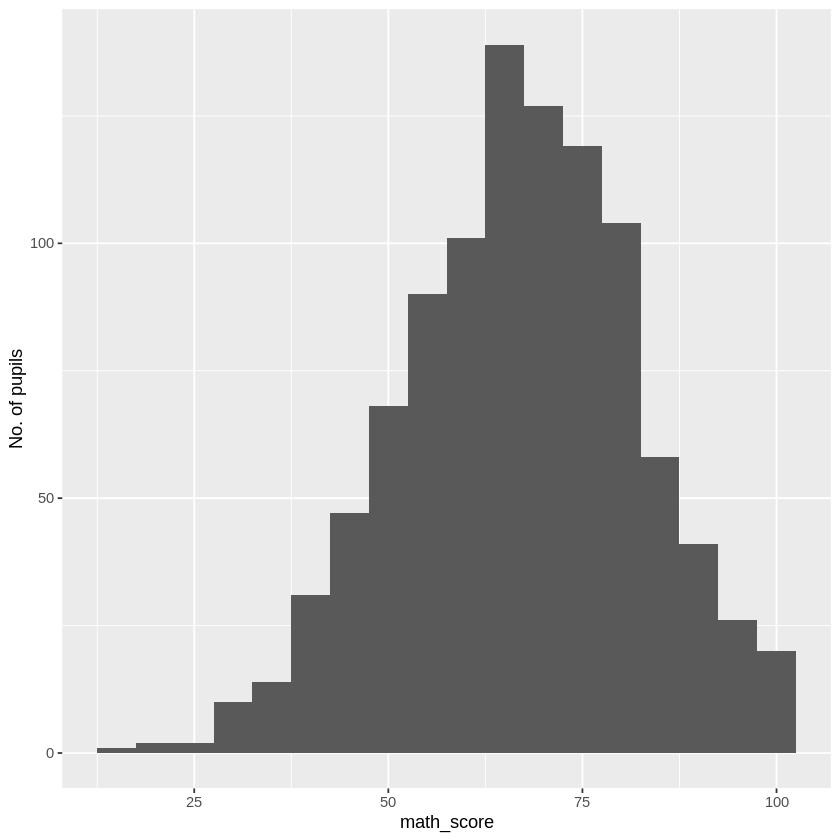

In [44]:
# Histogram with bin width for math_score
qplot(data$"math_score", geom = "histogram",  ylab = "No. of pupils", xlab = "math_score", binwidth = 5)

It does look very similar to normal distribution (but slightly skewed towards higher scores). Now let's try the same for reading and writing scores.

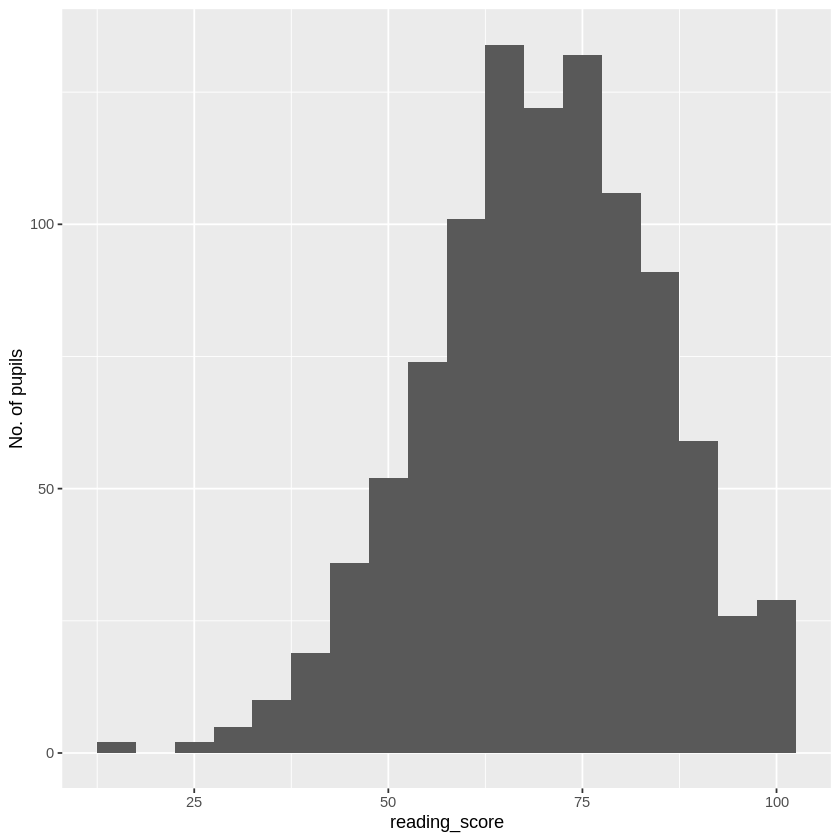

In [45]:
# Histogram for reading_score
qplot(data$"reading_score", geom = "histogram",  ylab = "No. of pupils", xlab = "reading_score", binwidth = 5)

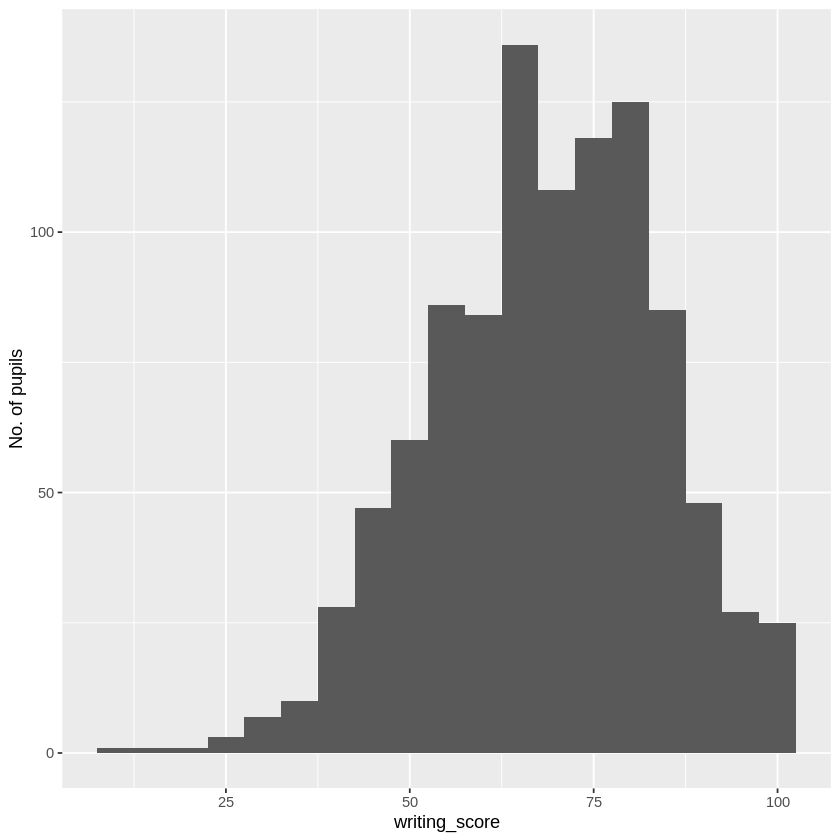

In [46]:
# Histogram for writing_score
qplot(data$"writing_score", geom = "histogram",  ylab = "No. of pupils", xlab = "writing_score", binwidth = 5)

## What about data that isn't numeric?
---

A linear regression is essentially a mathematical formula, which finds 2 terms (the slope and intercept) and can use that to predict new values. 

Obviously you cannot do any calculations on words (such as male or female). Therefore, we need to 'dummy code' categorical values such as sex.

When R does the mathematical equation for the regression, we do not want the new dummy codes to interfere with the calculation, to get around that, we code the data using 0 and 1. 

**There are many ways to dummy code your data, but to make things easy we are going to use a package!**

``` df_dummy <- dummy_cols(data, select_columns = c('column1', 'column2', 'column3'), remove_first_dummy = TRUE, remove_selected_columns = TRUE) ```

The above code sets the new dataframe in a variable called `df_dummy`, it then states which dataframe we mean, then in the brackets, you put the column names that you want dummy coded. 

```remove_selected_columns = TRUE``` tells R to delete the existing categorical data columns afterwards

```remove_first_dummy = TRUE``` tells R to remove the first dummy column. dummy_cols will create one column for each categorical value in the original column (so the sex columns becomes 2 columns called sex_female and sex_male) So removing the first column would leave the column sex__male,  where 1 means male and 0 means female. Removing the first ethnicity column leaves the other 4 columns and any row that has 0 in all four columns can be assumed to be ethnicity A.  This is important as it stops multicollinearity in your model (your variables being too related to each other messing up the results). 

### Exercise 5 ###
---

Dummy code the categorical columns, removing the first dummy and the original columns. 

In [49]:
# Let's get a new data frame where all the columns are numerical!
df_dummy <- dummy_cols(data, select_columns = c('gender', 'ethnicity', 'parental_education', 'lunch', 'preparation_course'), remove_first_dummy = TRUE, remove_selected_columns = TRUE)

head(df_dummy)
tail(df_dummy)

math_score,reading_score,writing_score,gender_male,ethnicity_group B,ethnicity_group C,ethnicity_group D,ethnicity_group E,parental_education_bachelor's degree,parental_education_high school,parental_education_master's degree,parental_education_some college,parental_education_some high school,lunch_standard,preparation_course_none
<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
62,56,61,0,1,0,0,0,0,0,0,0,1,0,0
34,54,55,0,0,1,0,0,0,1,0,0,0,0,0
58,71,63,0,0,1,0,0,0,0,0,0,0,1,0
55,71,73,0,0,0,1,0,0,0,0,0,1,0,0
71,79,82,0,0,0,0,1,0,0,0,1,0,1,0
71,85,81,0,0,0,0,0,0,1,0,0,0,0,0


math_score,reading_score,writing_score,gender_male,ethnicity_group B,ethnicity_group C,ethnicity_group D,ethnicity_group E,parental_education_bachelor's degree,parental_education_high school,parental_education_master's degree,parental_education_some college,parental_education_some high school,lunch_standard,preparation_course_none
<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
62,52,53,1,1,0,0,0,0,0,0,1,0,1,1
100,81,84,1,0,0,0,1,0,0,0,1,0,1,1
59,63,56,1,0,1,0,0,0,1,0,0,0,0,1
79,78,69,1,0,0,0,1,0,1,0,0,0,1,1
62,62,57,1,1,0,0,0,0,0,1,0,0,0,1
38,39,40,1,1,0,0,0,0,0,0,1,0,1,1


Nice! I see that it has added the columns at the end of the data frame (one of the questions I had was this!). Fab!

### We want to work out if all the independent variables (eg. gender, race, parents education) predict students exam peformance. ###
---

At the moment, writing, math and reading scores are seperated.   
Lets make a new column with the total scores.   

To do this we use the ``mutate()`` function 

``` new_df <- mutate(data, new_column = ....) ```

eg: 

``` new_df <- mutate(data, new_column = column1 / column2) ```  
``` new_df <- mutate(data, new_column = column1 + column2) ```  
``` new_df <- mutate(data, new_column = column1 * 2) ```  

etc..

### Exercise 6 ###
---

Using the mutate function, create a new column called ```total_score``` which contains the sum of each students reading, writing and math scores. 

In [52]:
# Adding new column total_score to the data frame

new_df <- mutate(data, total_score = math_score+ reading_score+writing_score)
head(new_df)


gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score,total_score
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
female,group B,some high school,free/reduced,completed,62,56,61,179
female,group C,high school,free/reduced,completed,34,54,55,143
female,group C,associate's degree,standard,completed,58,71,63,192
female,group D,some high school,free/reduced,completed,55,71,73,199
female,group E,some college,standard,completed,71,79,82,232
female,group A,high school,free/reduced,completed,71,85,81,237


I want to compare this to the average score column we had made. So I will create a new data frame (version 2) to see what happens.

In [53]:
# Adding new column average_score to the data frame to compare with previous numpy worksheet.

new_df_v2 <- mutate(data, average_score = (math_score+ reading_score+writing_score)/3)
head(new_df_v2)

gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score,average_score
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
female,group B,some high school,free/reduced,completed,62,56,61,59.66667
female,group C,high school,free/reduced,completed,34,54,55,47.66667
female,group C,associate's degree,standard,completed,58,71,63,64.00000
female,group D,some high school,free/reduced,completed,55,71,73,66.33333
female,group E,some college,standard,completed,71,79,82,77.33333
female,group A,high school,free/reduced,completed,71,85,81,79.00000


### We are now ready to do our multiple linear regression ###
---

We are looking to find out using our dataset if we can predict student exam performance. 

Therefore, total_score is our dependent variable (DV) as it can be changed by the other variables 

Gender, ethnicity, parental_education, lunch and preparation_course are therefore our independent variables (IV) as they cannot be affected by students exam performance.   

To do a linear regression, we are going to create a model that tests how significantly the IV's impact the DV.   

```
regression_model <- lm(DV ~ IV1 + IV2 + IV3..., data = df)
summary(regression_model)
```

The above code does a very similar thing to stats.linregress in python! 

**Some of the new dummy variable names are seperated by spaces, so to include them enclose them in \` ` (backtick)**

eg. \` ethnicity_group B `

### Exercise 7 ###
---
Perform a linear regression using total_score as the DV and display the summary data 


I am looking forward to doing this analyses. I want to compare this to my work with data exploration I did with this exact data set. To summarise, I found that Group E did well in all subjects. Males did better in maths while females did well in reading and writing. Parental education had an effect the over all scores as well. First I will look into gender and ethnicity.

In [61]:
regression_model <- lm(total_score ~ `gender` + `ethnicity`, data = new_df)
summary(regression_model)


Call:
lm(formula = total_score ~ gender + ethnicity, data = new_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-165.985  -27.417    2.311   28.040  105.324 

Coefficients:
                 Estimate Std. Error t value             Pr(>|t|)    
(Intercept)       207.738      4.792  43.355 < 0.0000000000000002 ***
gendermale        -14.284      2.625  -5.441         0.0000000669 ***
ethnicitygroup B   -6.207      5.450  -1.139                0.255    
ethnicitygroup C   -1.777      5.147  -0.345                0.730    
ethnicitygroup D   10.247      5.268   1.945                0.052 .  
ethnicitygroup E   24.667      5.671   4.350         0.0000150386 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 41.47 on 994 degrees of freedom
Multiple R-squared:  0.08558,	Adjusted R-squared:  0.08098 
F-statistic: 18.61 on 5 and 994 DF,  p-value: < 0.00000000000000022


As I had seen earlier in the data exploration project, I can see that Group E and gender plays shows significant impact on the student scores!

Now I want to see if the conclusions I made on parental education and ethnicity holds here.

In [60]:
regression_model2 <- lm(total_score ~ `parental_education` + `ethnicity`, data = new_df)
summary(regression_model)


Call:
lm(formula = total_score ~ parental_education + ethnicity, data = new_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-155.653  -27.174    1.224   29.653   94.347 

Coefficients:
                                    Estimate Std. Error t value
(Intercept)                          204.127      5.448  37.466
parental_educationbachelor's degree    5.982      4.936   1.212
parental_educationhigh school         -6.141      4.211  -1.458
parental_educationmaster's degree     18.276      5.599   3.264
parental_educationsome college        -3.677      4.001  -0.919
parental_educationsome high school   -17.649      4.263  -4.141
ethnicitygroup B                      -7.723      5.425  -1.424
ethnicitygroup C                      -1.334      5.111  -0.261
ethnicitygroup D                       9.650      5.245   1.840
ethnicitygroup E                      24.897      5.632   4.421
                                                Pr(>|t|)    
(Intercept)                        

Yes! The results look similar to the conclusions I had made with parental education playing a significant role. I had found that children who had parents with some high school or highschool education doing poorly compared thosw who had parents with bachelors degree or above. Pupils whose parents had Master's degree had slightly better scores. We see this here too, but, with less detail but more of a numerical score to say exactly how significant.  

### Lets understand the output ### 
---

**Statistical significance**

If something is statistically significant it means that the probability that the hypothesis (the thing your asking) is true/correct, is very very high aka less than 5% chance that the effect on the DV is random. 

So when reading a regression output, if the p-value (the right hand column) is less than 0.05 then it means it is significant, and more than 95% likely to be affecting the DV. 

In R, *'s are used to indicate which variables are significantly predicting the dependent variable. 

**The regression equation** 

The equation for a line of best fit is y = mx + c or y = slope*x + intercept. 

y = dependent variable
x = independent variable

In a multiple linear regression, we have multiple x. 

The equation is therefore:

```y = intercept + slope1*x1 + slope2*x2... ```

Each x (IV) has its own slope. 

**Coefficents (slope)**

The estimates column lists all the regression coefficents (slopes) for each variable. What these mean in simple terms is how much the dependent variable is increased or decreased by that variable. These only matter however, if the variable is significant.   

So for example, if gender_male was significant (p-value < 0.05) and had a positive coefficent, it would mean that male students were performing significantly better in their exams than female students. Therefore, gender predicted exam performance. A negative coefficent would mean that the score is less for males or rather more for females. 

**R squared**

R^2 is how well your variables explain the variance in value of the dependent variable. So the higher the R^2 value, the better your model explains the change in value of your dependent variable. 

A low R^2 doesnt necessarily mean that your model is bad, but indicates that the variables in your dataset are not telling the whole story! 

For example, a R^2 of 0.50 would mean that your data only explains 50% of the change in scores between each student. 

Essentially it tells you how well your model fits the data. 


**F-Statistic**

It shows results of a complex mathematical formula. But we only need to worry about it's significance! If your F statistic is significant ( p-value < 0.05), it means that when compared with a model which does not have any of the independent variables in it, your model is better. 


### Exercise 8 ###
---

Read the regression output and write some comments on the findings. 
Try to note which variables are significant, and evaluate how well the variables explain student performance. 


Write comments here 
Ha ha... Looks like I jumped to it sooner. Anyway, some of my conclusions still hold. I will give numbers here to support my claim.

Let's look at the variables, their slopes and p values one by one.

1. Gender:
This has a slope of -14.284 and p-value of 0.0000000669. 
This shows that the male students do worse than female in the total scores (although, I could do it by subjects as well). With p-values <0.05 gender variable does explain the differences we see in the data (that is the differences are not entirely random and there is a pattern due to gender).

2. Ethnicity:
Again ethnicity was one of the variables I had looked at in the data exploration. I find that my findings are similar here as well. 
  Group B has a slope of -7.723      
  group C has a slope of -1.334 
  group D has a slope of  9.650     
  group E has a slope of  24.897

with p-values of 0.15487, 0.79421, 0.06609 and 0.0000109 respectively. I had found that group B and C pupils performed worse in all 3 subjects. This shown here too with negative slopes for these 2 groups, however, this difference doesn't seem to be significant. Similarly, I had found that the group E pupils did well in all 3 subjects. I do find the same here with slope of nearly 25 and this change is significant with p-value of 0.0000109. Clearly showing that this trend is not random.
3. Parental education
I had found earlier that pupils whose parents had some high school or high school education did worse while those whose parents had Master's degree did really well in exams. It is again reinforced here with slopes for 
Bachelor's degree is 5.982, for high school it is -6.141, for master's degree it is 18.276, for some college it is -3.677 and some high school it is -17.649.
Again it shows that some high school and high school impact negatively on pupils' scores while master's degree has positive impact of pupils' scores. However, the p-values for master's degree (0.00114) isn't as high as some high school (0.0000376) which means that the just master's degree level education of parents alone doesn't fully explain the trend.

The R- Squared value for these two models are 0.08558 and 0.1045. The models only explains 8-10% of the data. That is because I only looked at 2 variables at a time. The more independent variables included, better the model fit.

### Assumptions ###
---

Thinking back to the 'testing for normality' worksheet...

When we do linear regressions we have to assume that our data is guassian (normally distributed). We therefore now need to test that our assumptions of normality are true and that our model is therefore meaningful. 

1. linearity :

``` plot(model, 1) ```

A largely horizontal line at about 0 means that our data has good linearity, meaning our model is good!

2. Q-Q plot or P-P plot: 

``` plot(model, 2) ```

The points following a straightish diagonal line means that again we have good normality. 


### Exercise 9 ###
---

Check both the assumptions of your model and write a comment with your findings

Previously looking at the histogram in exercise 4 I thought that distribution looked close to normal except a bit skewed at high exam scores (to right). So I do not expect a flat line at 0, but, expect a line that has one or more smallish bumps around 0.

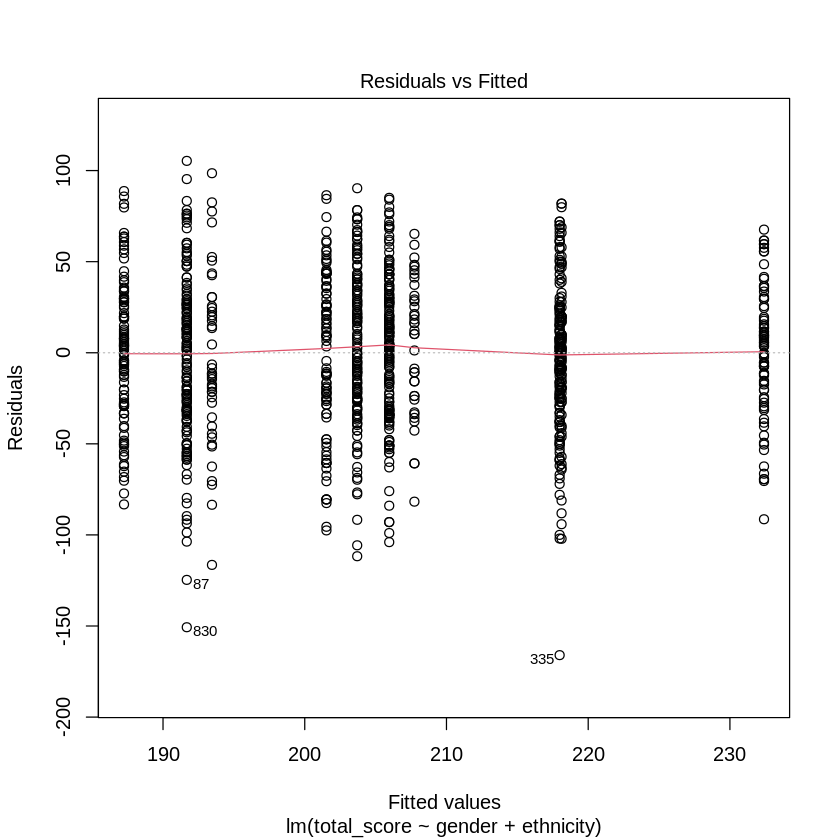

In [62]:
plot(regression_model, 1)

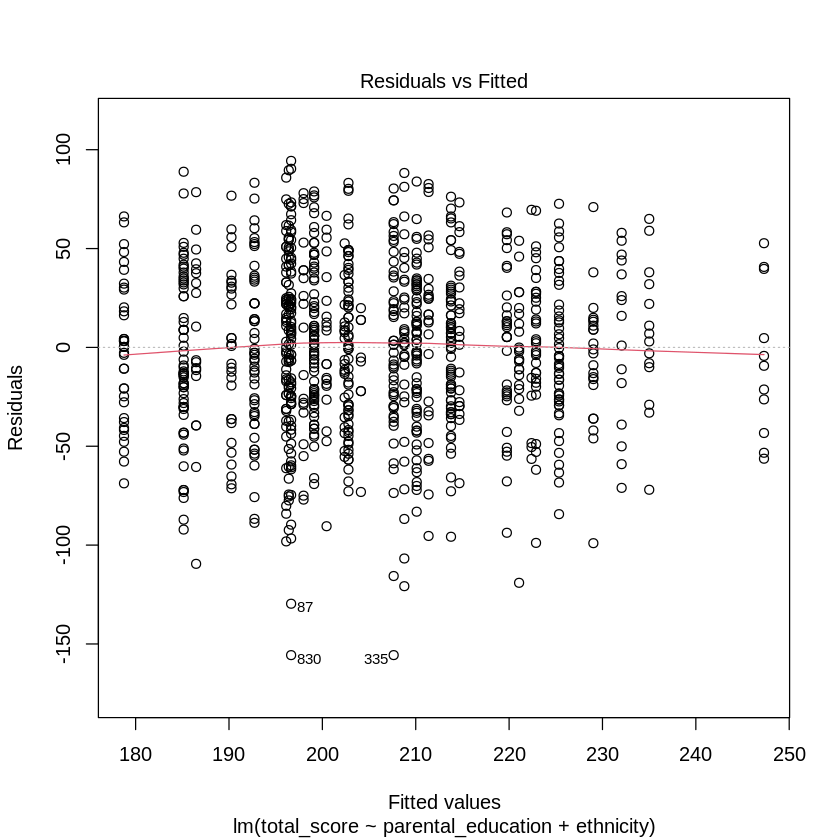

In [63]:
plot(regression_model2, 1)

As expected both my models has one small bump each around 0 at different points.

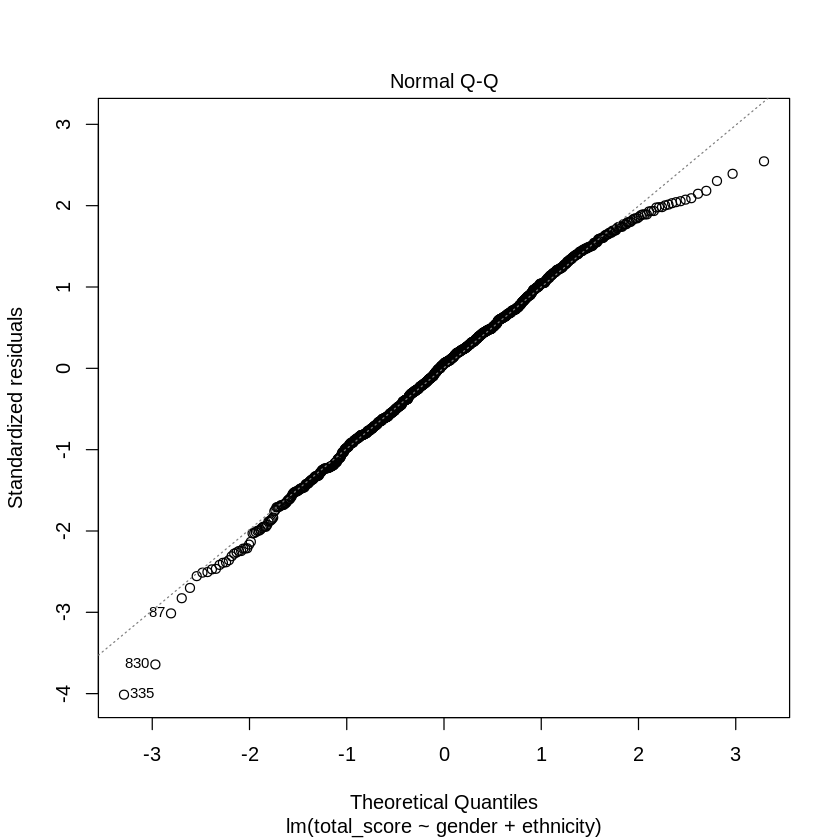

In [64]:
plot(regression_model, 2)

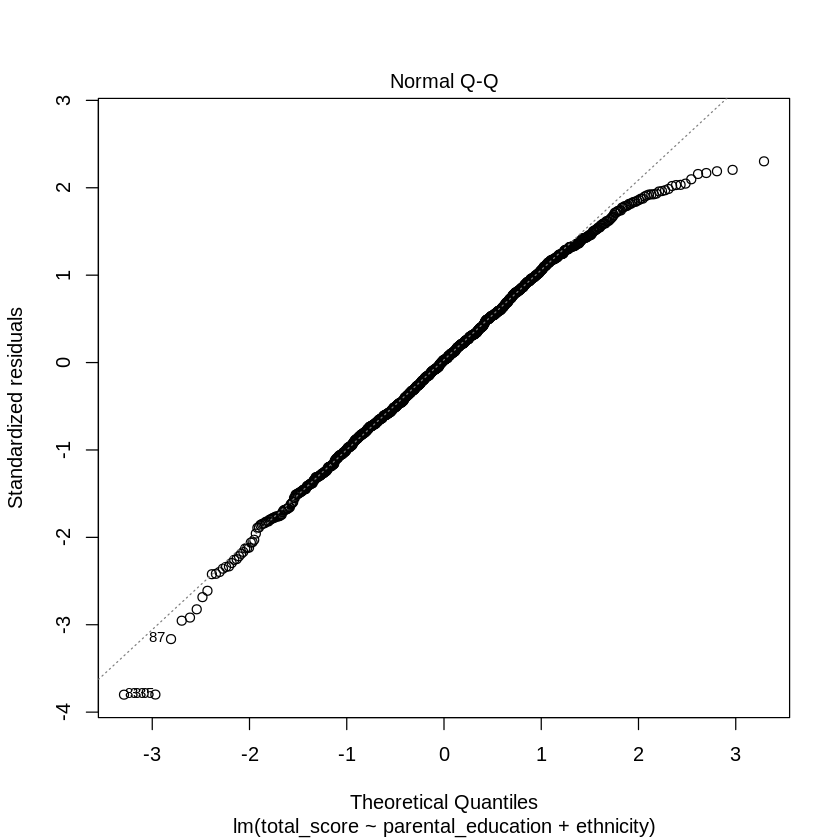

In [65]:
plot(regression_model2, 2)

As expected the linear plots show a small bump around 0. Similarly, Q-Q plots again shows that the data is skewed to the right. The rest of the data still follows normal distribution.

# Exploring the data
---

In the previous exercises, we only looked at the effect on `total score`. Now that we know that some of our variables did significantly predict student exam scores let's explore it in more detail. 

### Exercise 10
---

* Run a regression called `write_mod` using `writing_score` as the DV 
* Run a regression called `read_mod` using `reading_score` as the DV
* Run a regression called `math_mod` using `math_score` as the DV 
* Compare the results with the model from exercise 7 and comment your findings
* Compare the results of each model with each other. What inferences can you 
make?
* Look at the difference in coefficents of significant variables between models - what does it tell you?


Let's look into math score based on gender and ethnicity.

In [80]:
regression_math <- lm(math_score ~ `gender` + `ethnicity`, data = new_df)
summary(regression_math)


Call:
lm(formula = math_score ~ gender + ethnicity, data = new_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.226  -9.317   0.585   9.774  35.321 

Coefficients:
                 Estimate Std. Error t value             Pr(>|t|)    
(Intercept)      62.27888    1.67008  37.291 < 0.0000000000000002 ***
gendermale        3.91210    0.91509   4.275        0.00002094739 ***
ethnicitygroup B -1.51166    1.89967  -0.796               0.4264    
ethnicitygroup C  0.03482    1.79398   0.019               0.9845    
ethnicitygroup D  4.13654    1.83604   2.253               0.0245 *  
ethnicitygroup E 11.98471    1.97659   6.063        0.00000000189 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.45 on 994 degrees of freedom
Multiple R-squared:  0.1025,	Adjusted R-squared:  0.09801 
F-statistic: 22.71 on 5 and 994 DF,  p-value: < 0.00000000000000022


Male students do better than female students by scoring 4% more than female students. This difference is significant with a p-value 0.00002094739. This means that the trend is not random. 

Similarly, the pupils from enthinic group E, do much better than the other pupils in maths by scoring nearly 12% higher with a p-value 0.00000000189. Again this shows that the difference is significant. 

How about reading scores? 

In [81]:
regression_read <- lm(reading_score ~ `gender` + `ethnicity`, data = new_df)
summary(regression_read)


Call:
lm(formula = reading_score ~ gender + ethnicity, data = new_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-58.101  -9.130   0.367   9.202  35.035 

Coefficients:
                 Estimate Std. Error t value             Pr(>|t|)    
(Intercept)       73.3080     1.6122  45.470 < 0.0000000000000002 ***
gendermale        -8.1649     0.8834  -9.243 < 0.0000000000000002 ***
ethnicitygroup B  -2.5103     1.8339  -1.369              0.17136    
ethnicitygroup C  -1.1778     1.7318  -0.680              0.49659    
ethnicitygroup D   1.7928     1.7724   1.011              0.31203    
ethnicitygroup E   6.1035     1.9081   3.199              0.00142 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.95 on 994 degrees of freedom
Multiple R-squared:  0.1137,	Adjusted R-squared:  0.1092 
F-statistic:  25.5 on 5 and 994 DF,  p-value: < 0.00000000000000022


Male students do worse than female students in reading by scoring 8% less than female students. This difference is significant with a p-value 0.0000000000000002. This means that the trend is not random.

Similarly, the pupils from enthinic group E, do much better than the other pupils in reading by scoring nearly 6% higher with a p-value 0.00142. Again this shows that the difference is not very significant for reading scores.

Now let's look at the writing scores next.

In [82]:
regression_write <- lm(writing_score ~ `gender` + `ethnicity`, data = new_df)
summary(regression_write)


Call:
lm(formula = writing_score ~ gender + ethnicity, data = new_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-59.469  -9.485   0.531   9.919  36.515 

Coefficients:
                 Estimate Std. Error t value             Pr(>|t|)    
(Intercept)       72.1508     1.6481  43.779 < 0.0000000000000002 ***
gendermale       -10.0310     0.9030 -11.108 < 0.0000000000000002 ***
ethnicitygroup B  -2.1852     1.8746  -1.166             0.244031    
ethnicitygroup C  -0.6343     1.7703  -0.358             0.720186    
ethnicitygroup D   4.3180     1.8118   2.383             0.017350 *  
ethnicitygroup E   6.5786     1.9505   3.373             0.000773 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.26 on 994 degrees of freedom
Multiple R-squared:  0.1498,	Adjusted R-squared:  0.1455 
F-statistic: 35.02 on 5 and 994 DF,  p-value: < 0.00000000000000022


The gender results are very similar to reading scores.
Male students do worse than female students in reading by scoring 10% less than female students. This difference is significant with a p-value 0.0000000000000002. This means that the trend is not random.

Similarly, the pupils from enthinic group E, do much better than the other pupils in writing by scoring nearly 6.5% higher with a p-value 0.000773. This shows that the difference is very significant for writing scores. This is different from reading scores where this was not a significant factor.

# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer:

## What caused you the most difficulty?

Your answer: